# Requirements

In [38]:
import cv2
import os
import matplotlib.pyplot as plt
import numpy as np

# Load & Display Image

Text(0.5, 1.0, 'BRG to RGB')

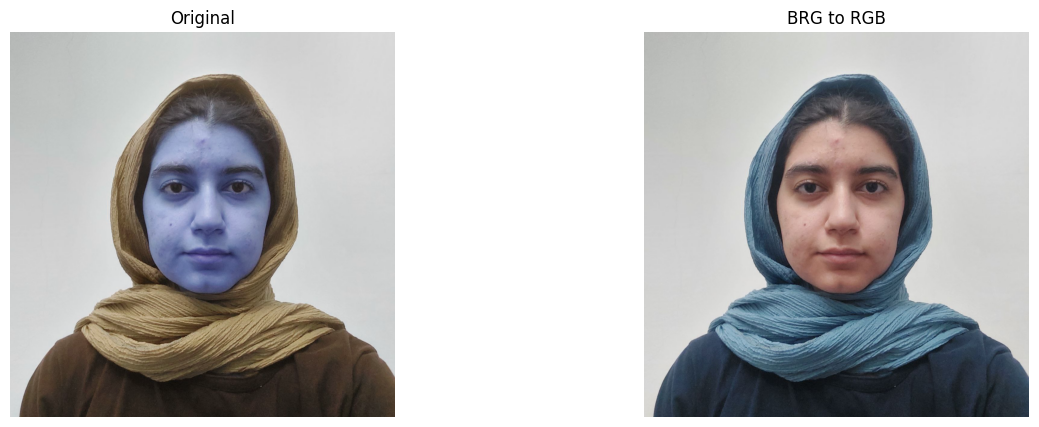

In [46]:
# image address
image_address = os.path.join("me.jpg")

image = cv2.imread('me.jpg')


# convert channels from BGR to RGB

#image_rgb = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # approach 1
image_rgb = image[:, :, ::-1] # approach 2
## OpenCv can be used in this case, however, rearranging the channels is a good alternative.


# dispaly
plt.figure(figsize=(15, 5))
plt.subplot(1, 2, 1)
plt.imshow(image)
plt.axis("off")
plt.title("Original")

plt.subplot(1, 2, 2)
plt.axis("off")
plt.imshow(image_rgb)
plt.title("BRG to RGB")

# Creating Sketch

(-0.5, 1279.5, 1279.5, -0.5)

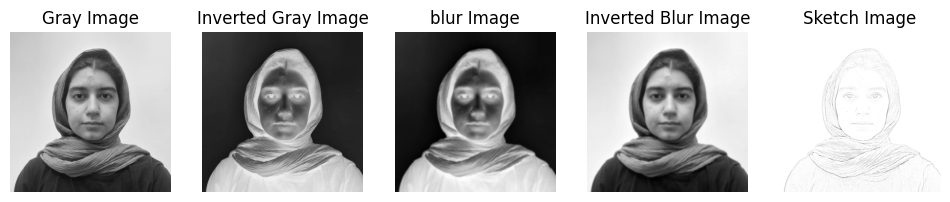

In [47]:
# Convert the input image from BGR to grayscale
gray_image = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

# Invert the grayscale image (i.e., produce a negative of the grayscale image)
inverted_image = 255 - gray_image

# Apply Gaussian blur to the inverted image with a kernel size of 21x21
blur_image = blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)

# Invert the blurred image to produce a semi-transparent effect
inverted_blur = 255 - blur_image

# Divide the grayscale image by the inverted blurred image to produce the sketch effect
sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)

# display


plt.figure(figsize=(12, 12))

plt.subplot(1, 5, 1)
plt.imshow(gray_image, cmap="gray")
plt.title("Gray Image")
plt.axis("off")

plt.subplot(1, 5, 2)
plt.imshow(inverted_image, cmap="gray")
plt.title("Inverted Gray Image")
plt.axis("off")

plt.subplot(1, 5, 3)
plt.imshow(blur_image, cmap="gray")
plt.title("blur Image")
plt.axis("off")

plt.subplot(1, 5, 4)
plt.imshow(inverted_blur, cmap="gray")
plt.title("Inverted Blur Image")
plt.axis("off")

plt.subplot(1, 5, 5)
plt.imshow(sketch, cmap="gray")
plt.title("Sketch Image")
plt.axis("off")

In [20]:
# Create a function that takes an RGB image and outputs sketched image.

def RGB2sketched(RGB_image):
    gray_image = cv2.cvtColor(RGB_image, cv2.COLOR_BGR2GRAY)
    inverted_image = 255 - gray_image
    blur_image = blur_image = cv2.GaussianBlur(inverted_image, (21, 21), 0)
    inverted_blur = 255 - blur_image 
    sketch = cv2.divide(gray_image, inverted_blur, scale=256.0)
    return sketch


# Sketching WebCam Video Stream in Real-time


In [15]:
# Based on the the function you created, write a script to convert stream of frames from webcam into sketched frame.

cap = cv2.VideoCapture(0)

if not cap.isOpened():
    print("Error: Could not open webcam.")
    exit()
    
while True:
    ret, frame = cap.read()
    if ret:
        # Using the defined function above
        sketched_frame = RGB2sketched(frame)
        
        # Real-time displaying
        cv2.imshow('Sketched Frame', sketched_frame)
        
        # Press Q to end
        if cv2.waitKey(1) & 0xFF == ord('q'):
            break
    else:
        print("Error: Could not read frame.")
        break

cap.release()
cv2.destroyAllWindows()

# Sketching a Video in Real-time


In [29]:

video_path = r'C:\Users\mahya\Indiantraffic.avi'
video = cv2.VideoCapture(video_path)

if not video.isOpened():
    print("Error: Could not open input video file.")
    exit()

fps = int(video.get(cv2.CAP_PROP_FPS))
frame_width = int(video.get(cv2.CAP_PROP_FRAME_WIDTH))
frame_height = int(video.get(cv2.CAP_PROP_FRAME_HEIGHT))


output_video_path = r'C:\Users\mahya\SketchedTraffic.avi'
fourcc = cv2.VideoWriter_fourcc(*'MJPG')
out = cv2.VideoWriter(output_video_path, fourcc, fps, (frame_width, frame_height))

if not out.isOpened():
    print("Error: Could not initialize VideoWriter.")
    video.release()
    exit()

# Process each frame of the video
while True:
    ret, frame = video.read()
    if not ret:
        print("Finished processing or error reading frame.")
        break

    # Apply sketch effect
    sketched_frame = RGB2sketched(frame)

    # Write the processed frame to the output video
    out.write(sketched_frame)

    # Display the frame for debugging 
    cv2.imshow('Sketched Frame', sketched_frame)

    # Press 'q' to stop early
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Release resources
video.release()
out.release()
cv2.destroyAllWindows()

print(f"Sketched video saved at {output_video_path}")


Error: Could not read frame./End
Sketched video saved at C:\Users\mahya\SketchedTraffic.avi


# Saving final picture

In [48]:
output_path = "result_image.jpg" 
sketch = cv2.cvtColor(sketch, cv2.COLOR_BGR2RGB)
cv2.imwrite(output_path, sketch)
print(f"Image saved at {output_path}")

Image saved at result_image.jpg


Finished processing or error reading frame.
Sketched video saved at C:\Users\mahya\SketchedTraffic.avi
